In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from PIL import Image
import cv2
import numpy as np
import pandas as pd
from time import time
import os
from keras.utils import to_categorical 
from sklearn.preprocessing import LabelBinarizer  
from numpy import asarray,save  

In [71]:
DIRECTORY = r"/content/drive/MyDrive/anh/hoa_folder"
CATEGORIES = ["hoa_sen", "hoa_sung","hoa_mai","hoa_dao","hoa_hong"]
data = []

img_size = 150;
BATCH_SIZE = 32;

In [72]:
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    class_num = CATEGORIES.index(category) 
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = cv2.imread(img_path, cv2.IMREAD_COLOR)
        image_array = cv2.resize(image,(img_size,img_size))
        
        data.append([image_array,class_num])


In [73]:
print(len(data))

325


In [74]:
images = []
labels = []
for image, label in data:
    images.append(image)
    labels.append(label)

images = asarray(images)
labels = np.array(labels)


print(images.shape, labels.shape)

(325, 150, 150, 3) (325,)


In [75]:
# lb = LabelBinarizer()  #chuyển về dạng one_hot vector
# labels = lb.fit_transform(labels)
labels = to_categorical(labels)
labels.shape
photos = images.astype('float32')/255.0

photos.shape
print(images.shape)
print(labels.shape)

(325, 150, 150, 3)
(325, 5)


In [76]:

(trainX, testX, trainY, testY) = train_test_split(images, labels, test_size=0.20, stratify=labels, random_state=10)

(trainX, valX, trainY, valY) = train_test_split(trainX, trainY, test_size=0.25, random_state=10)

In [77]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(valX.shape)
print(valY.shape)

(195, 150, 150, 3)
(195, 5)
(65, 150, 150, 3)
(65, 5)
(65, 150, 150, 3)
(65, 5)


In [90]:
hinh = trainX[150]
plt.imshow(hinh) 
plt.show()  
print(encode[int(trainY[i][[1]])]))

SyntaxError: ignored

In [86]:
encode ={0:"hoa_sen", 1:"hoa_sung",2:"hoa_mai",3:"hoa_dao",4:"hoa_hong"}

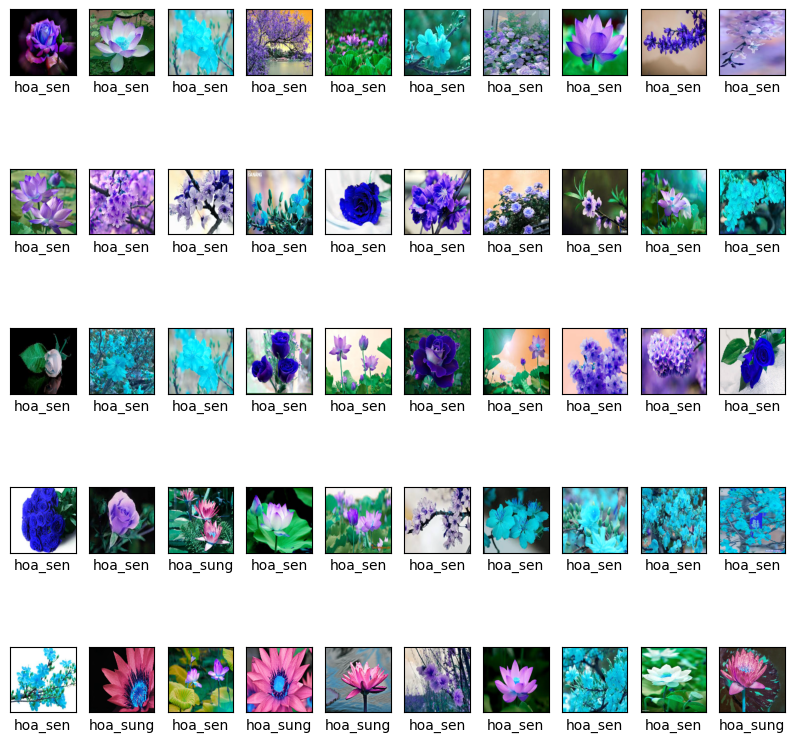

In [84]:
plt.figure(figsize=(10,10))
for i in range(50):
    image = trainX[i] #.reshape(img_size, img_size)
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image)
    plt.xlabel(encode[int(trainY[i][[1]])])

plt.show()